In [101]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice, rand 
import networkx as nx
%matplotlib inline

### Random Walk

#### 1. Load network 

In [102]:
## load sample network 
G = nx.karate_club_graph()

## get adj matrix 
node_list = G.nodes()
node_list.sort()
A = np.array(nx.to_numpy_matrix(G=G,nodelist=node_list,weight='weight'))   
                ## we don't really have weight here
    
## node degree matrix D -- diagonal matrix with node degree on diag
D = np.diag(A.sum(axis=1))

## P_ij -- transitation probability matrix =inv(D)*A
P_ij = np.linalg.inv(D).dot(A) ## matrix inversion is costly
                            ## you can also use P = A/np.array([[x] for x in a.sum(axis=1)])

- we also need the initial probability of being in a node, 
- it is represented as a row vector p_t_row 

#### 2. Simple Random Walk simulation

In [106]:
def RandomWalk(G, xi, n):
    nodeSeq = []
    nodeSeq.append(xi)
    for i in range(n):
        xi = choice(a = node_list,size=1,p=P_ij[xi])[0]       ## choise one element from a list, with certain probability
        nodeSeq.append(xi)
    return nodeSeq

- get node list and edge list, and make graph

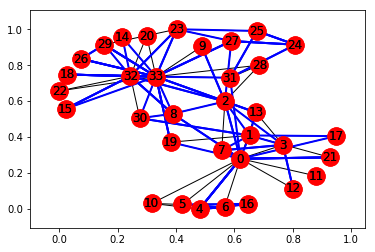

In [118]:
nodeSeq = RandomWalk(G,6,100)
edgeSeq = [(nodeSeq[i-1], nodeSeq[i]) for i in range(1,len(nodeSeq))]
layout = nx.spring_layout(G)
nx.draw_networkx(G,pos =layout)
nx.draw_networkx(G,pos =layout, edgelist = edgeSeq, edge_color='blue', width=2)

#### 3. Say initial node can be any one

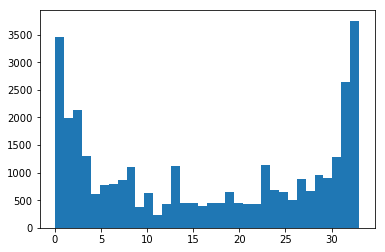

In [129]:
### every node have equal chance to be initial node 
nodeSeq = []
for xi in node_list:
    nodeSeq.extend(RandomWalk(G, xi, 1000))
h = plt.hist(nodeSeq, bins = G.number_of_nodes())

#### 4. Random Walk matrix form 

<table><tr><td><img src='pic/00_random_walk.PNG'></td><td><img src='pic/01_random_walk.PNG'></td></tr></table>

In [150]:
###random walk matrix from 
def random_walk_matrix(P_ij,node_list,n):
    ## p_ini is a row vector with uniform probablity
    p_ini = np.zeros(len(node_list)) + 1/len(node_list)
    p = p_ini
    for i in range(n):
        p = p.dot(P_ij)
    return p 

<Container object of 34 artists>

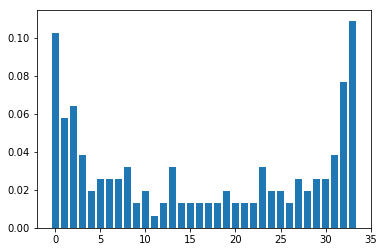

In [154]:
### p = probability of reaching to each node 
p = random_walk_matrix(P_ij,node_list,1000)
plt.bar(node_list,p)